In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

# plt.style.use('fivethirtyeight')


%matplotlib inline

In [12]:
df=pd.read_csv('Features_DT.csv')
df.shape

(65052, 34)

In [13]:
df.head()

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,...,city,zipcode,county,tdsp,dma,ev_driver,segment,OrderMonth,OrderDayOfWeek,accept
0,0.0,0.000000,0.000000,0.055531,0.042857,1.000000,0.0,1.000000,0.333333,0.865385,...,3.0,3.0,2.0,2.0,0.0,0.0,6.0,2.0,2.0,0
1,0.0,0.202020,0.000000,0.120366,0.000000,0.106470,0.0,1.000000,0.600000,0.887363,...,3.0,3.0,1.0,0.0,1.0,0.0,8.0,2.0,3.0,0
2,0.0,0.000000,0.000000,0.065661,0.000000,1.000000,0.0,1.000000,0.066667,0.090659,...,2.0,3.0,1.0,0.0,1.0,0.0,5.0,4.0,0.0,0
3,0.0,0.242424,0.000000,0.155561,0.000000,0.004825,0.0,0.000000,0.133333,0.678571,...,3.0,3.0,2.0,0.0,1.0,0.0,3.0,11.0,1.0,0
4,0.0,0.121212,0.043478,0.108510,0.000000,0.564942,0.0,0.333333,1.000000,0.412088,...,2.0,3.0,1.0,0.0,1.0,0.0,11.0,7.0,3.0,0


In [14]:
num_cols =['oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'curr_usage', 'deposit_onhand_amt', 'sap_productname', 'numweblog_cnt',
       'OrderYear', 'OrderDay', 'OrderDayOfYear', 'IsWeekend']
ctgy_cols=['tos_flg', 'disconotice_flg', 'latefee_flg', 'dwelling_type_cd',
       'product_type_cd', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'ebill_enroll_flag', 'called_flg', 'oam_flg', 'disconnects_flg',
       'load_profile', 'city', 'zipcode', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'OrderMonth', 'OrderDayOfWeek']


In [15]:
len(num_cols)

11

In [16]:
df_num=df[num_cols]

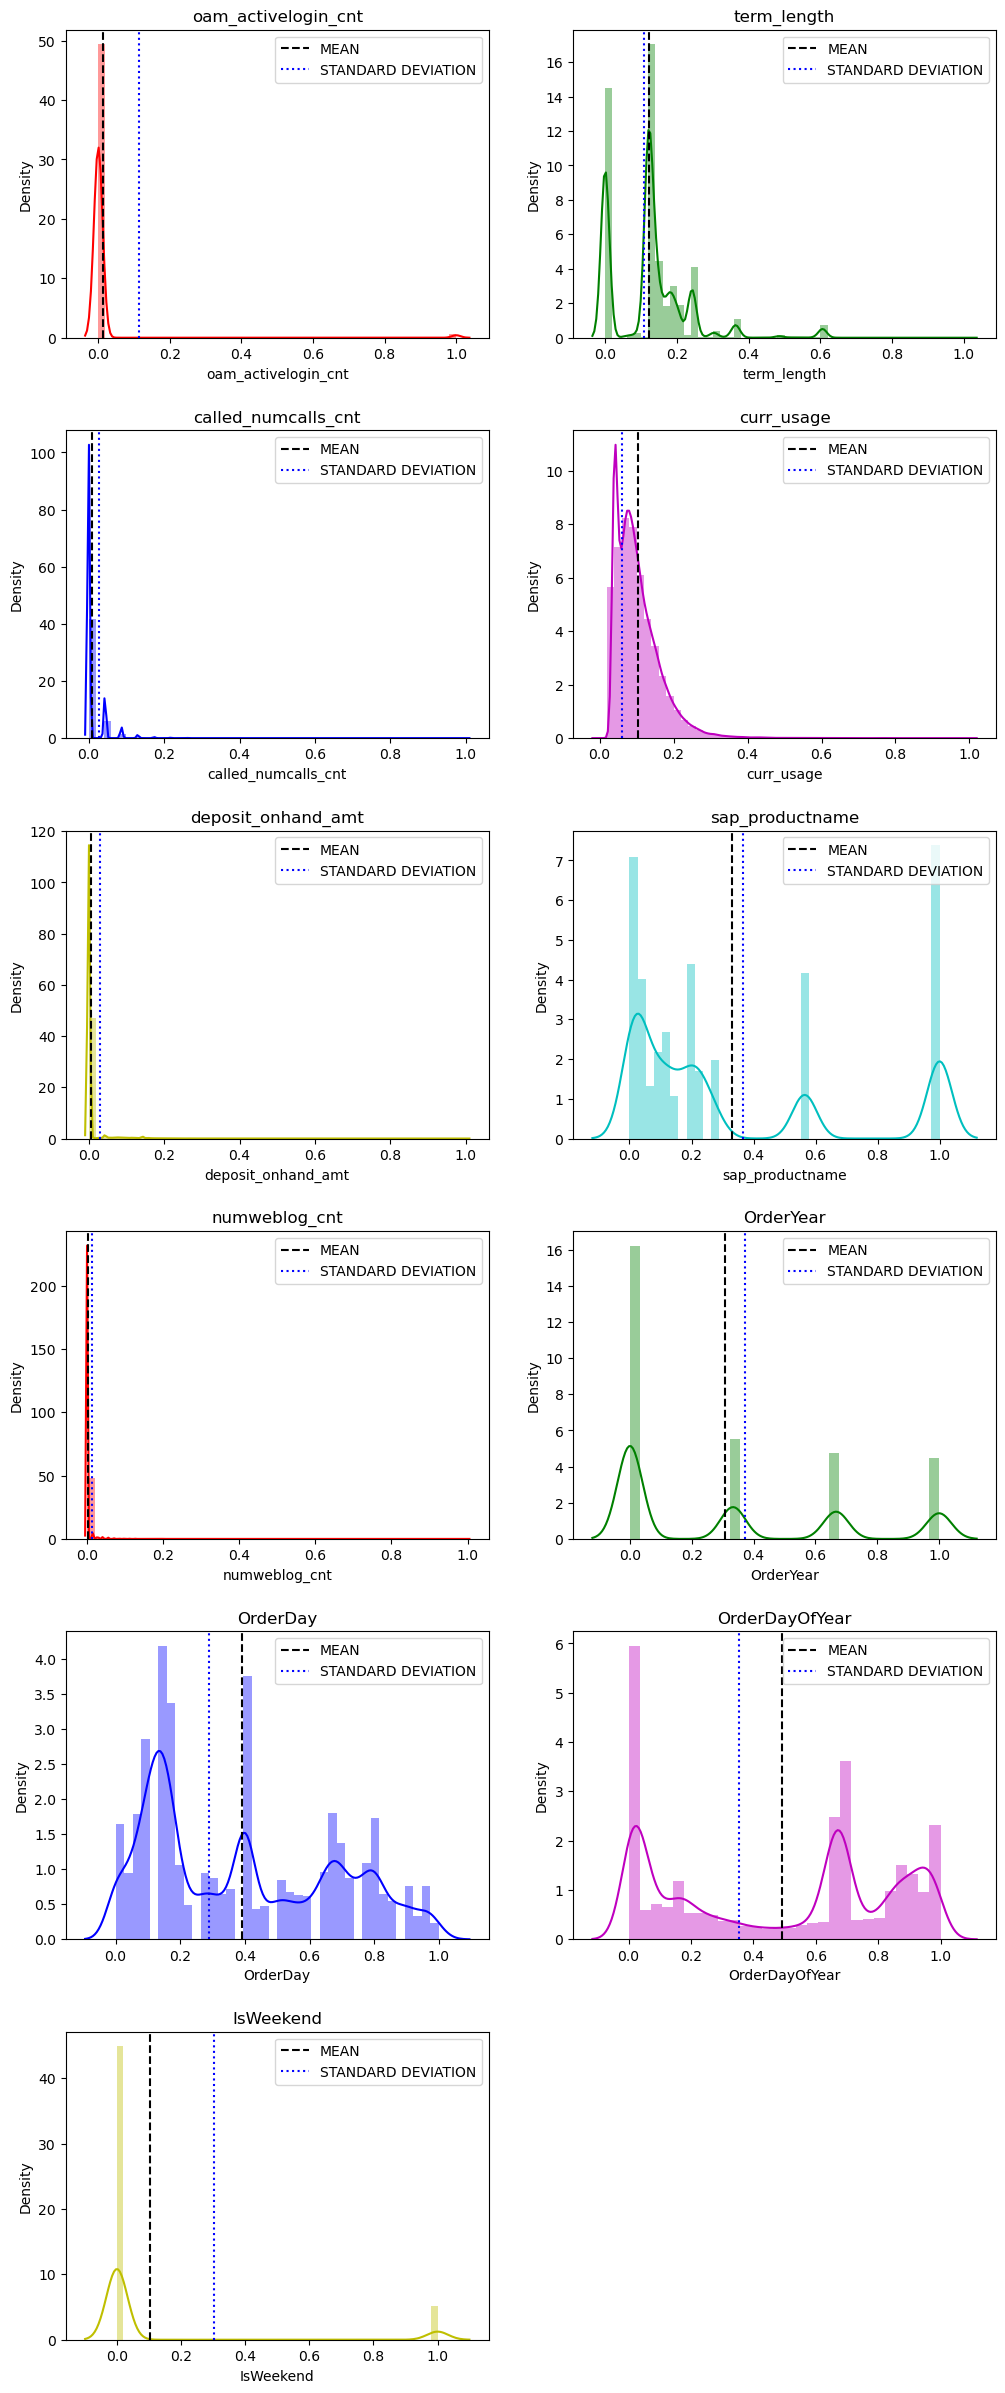

In [17]:
columns = df_num.columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","r","g","b","m","y"] 

plt.figure(figsize=(12,30))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(6,2,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df_num[i],color=k)
    #sns.boxplot(df_num[i+1],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

## Boxplots

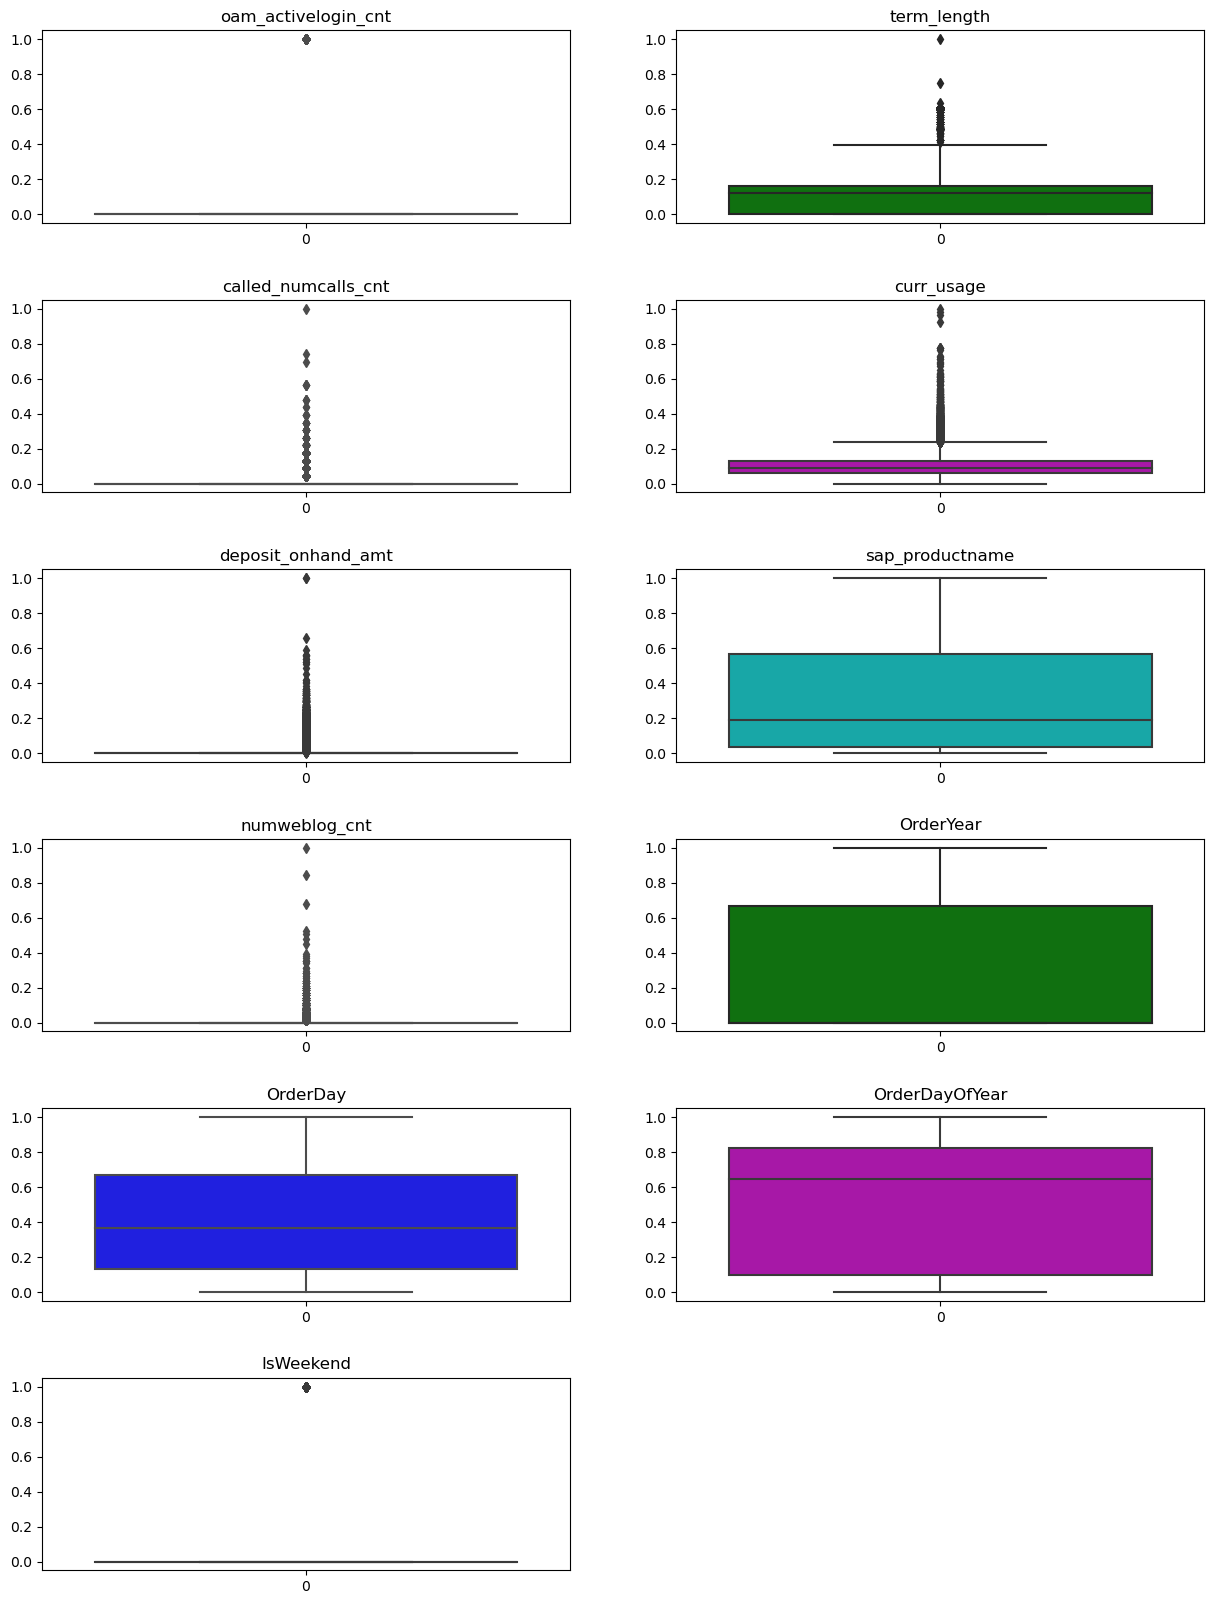

In [18]:
columns = df_num.columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","r","g","b","m","y",] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(6,2,j+1)
    sns.boxplot(df_num[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    # plt.legend(loc="upper right")
    

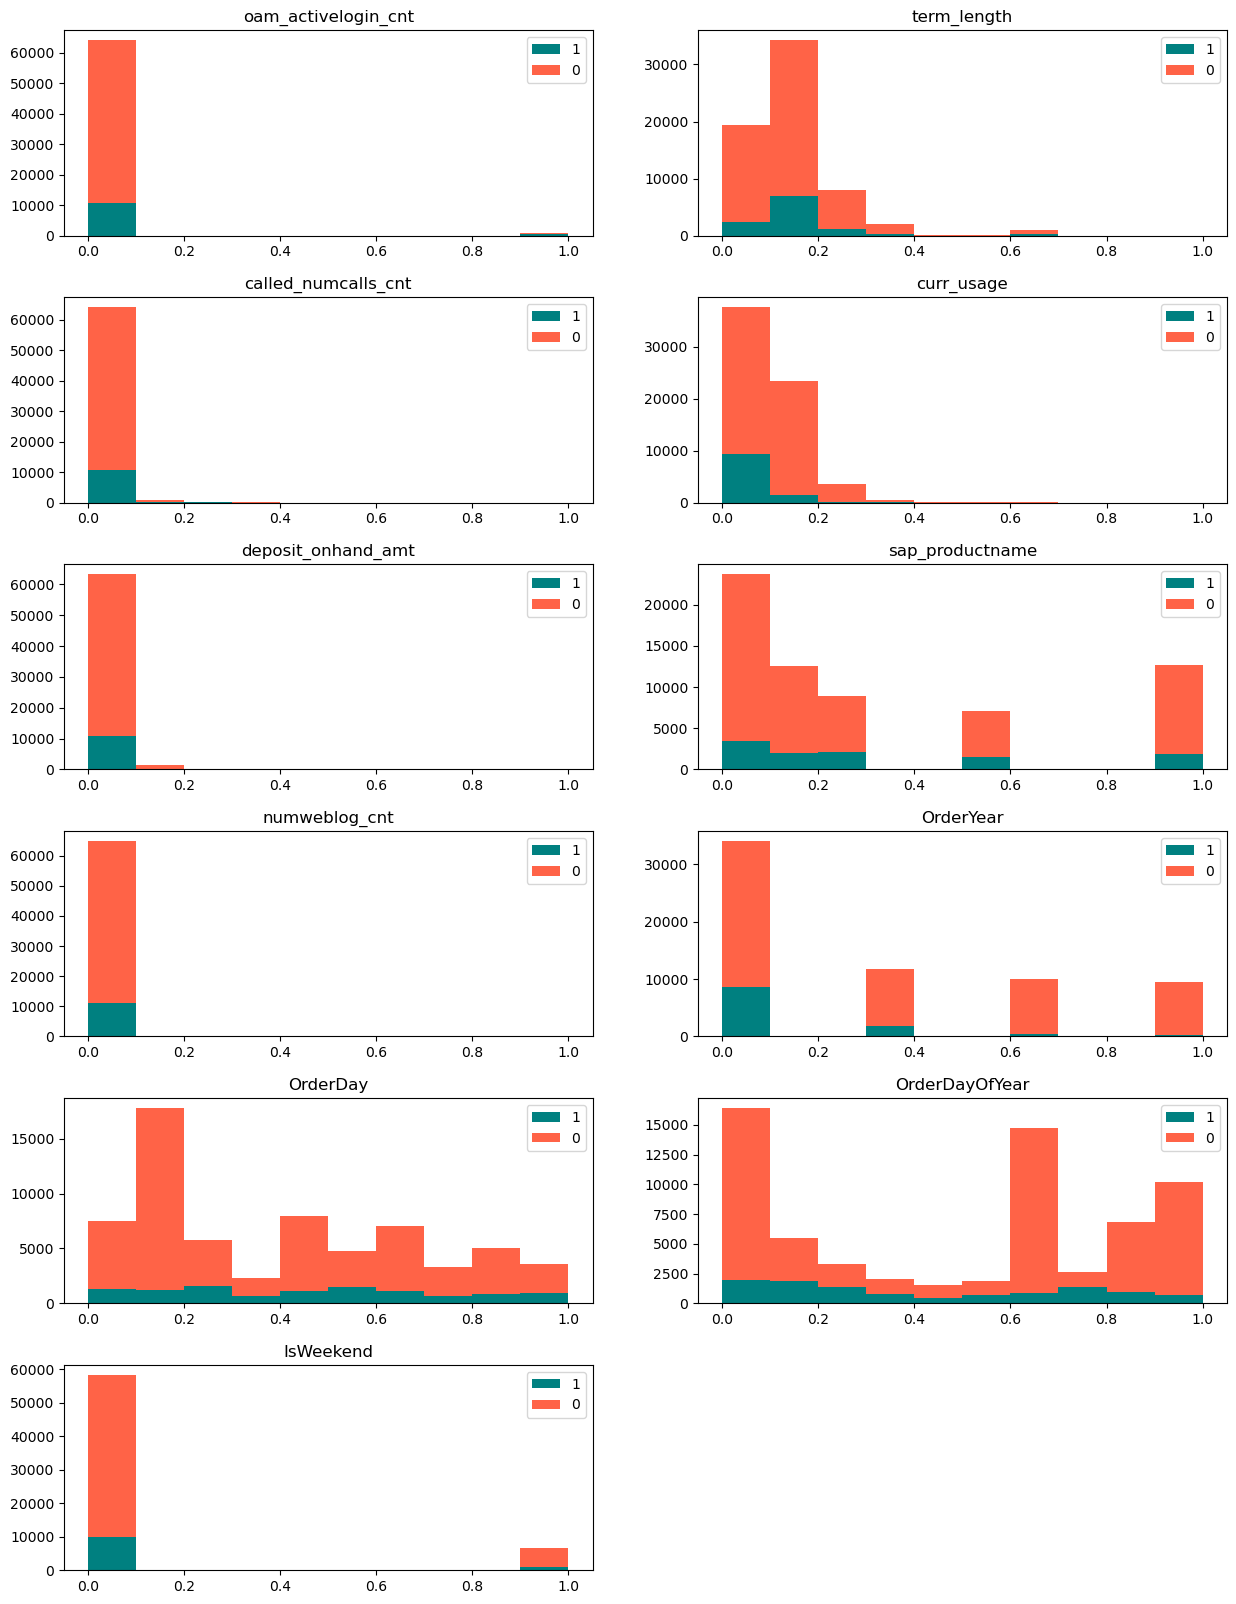

In [20]:
columns = df_num.columns
length  = len(columns)
#colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(15,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(6,2,j+1)
    plt.hist(x = [df[df['accept']==1][i], df[df['accept']==0][i]], 
         stacked=True, color = ['teal','tomato'],label = ['1','0'])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

### Bivariate Analysis

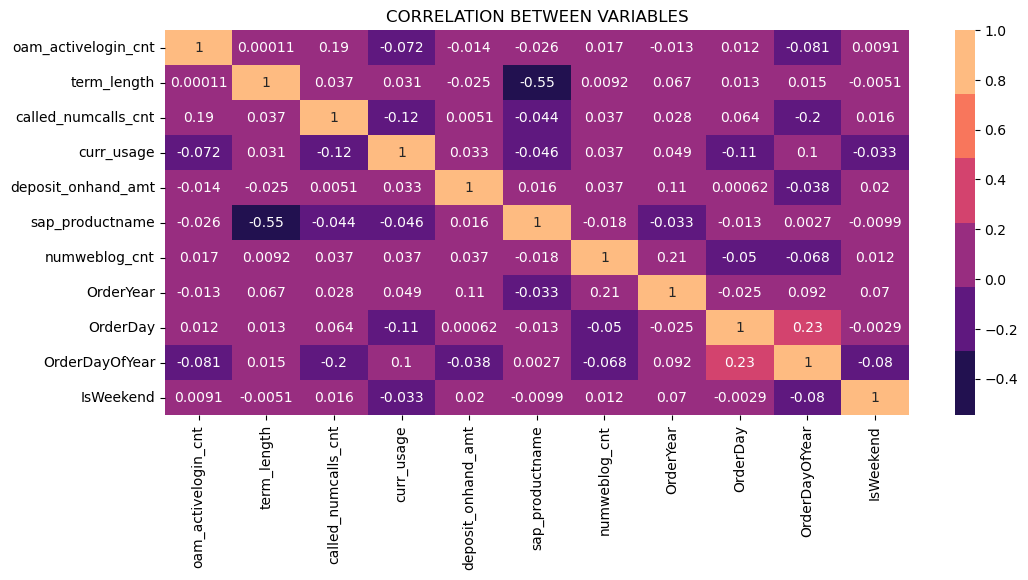

In [28]:
correlation = df_num.corr()
plt.figure(figsize=(12,5))
sns.heatmap(correlation,annot=True,edgecolor="k",cmap=sns.color_palette("magma"))
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

### ScatterPlots

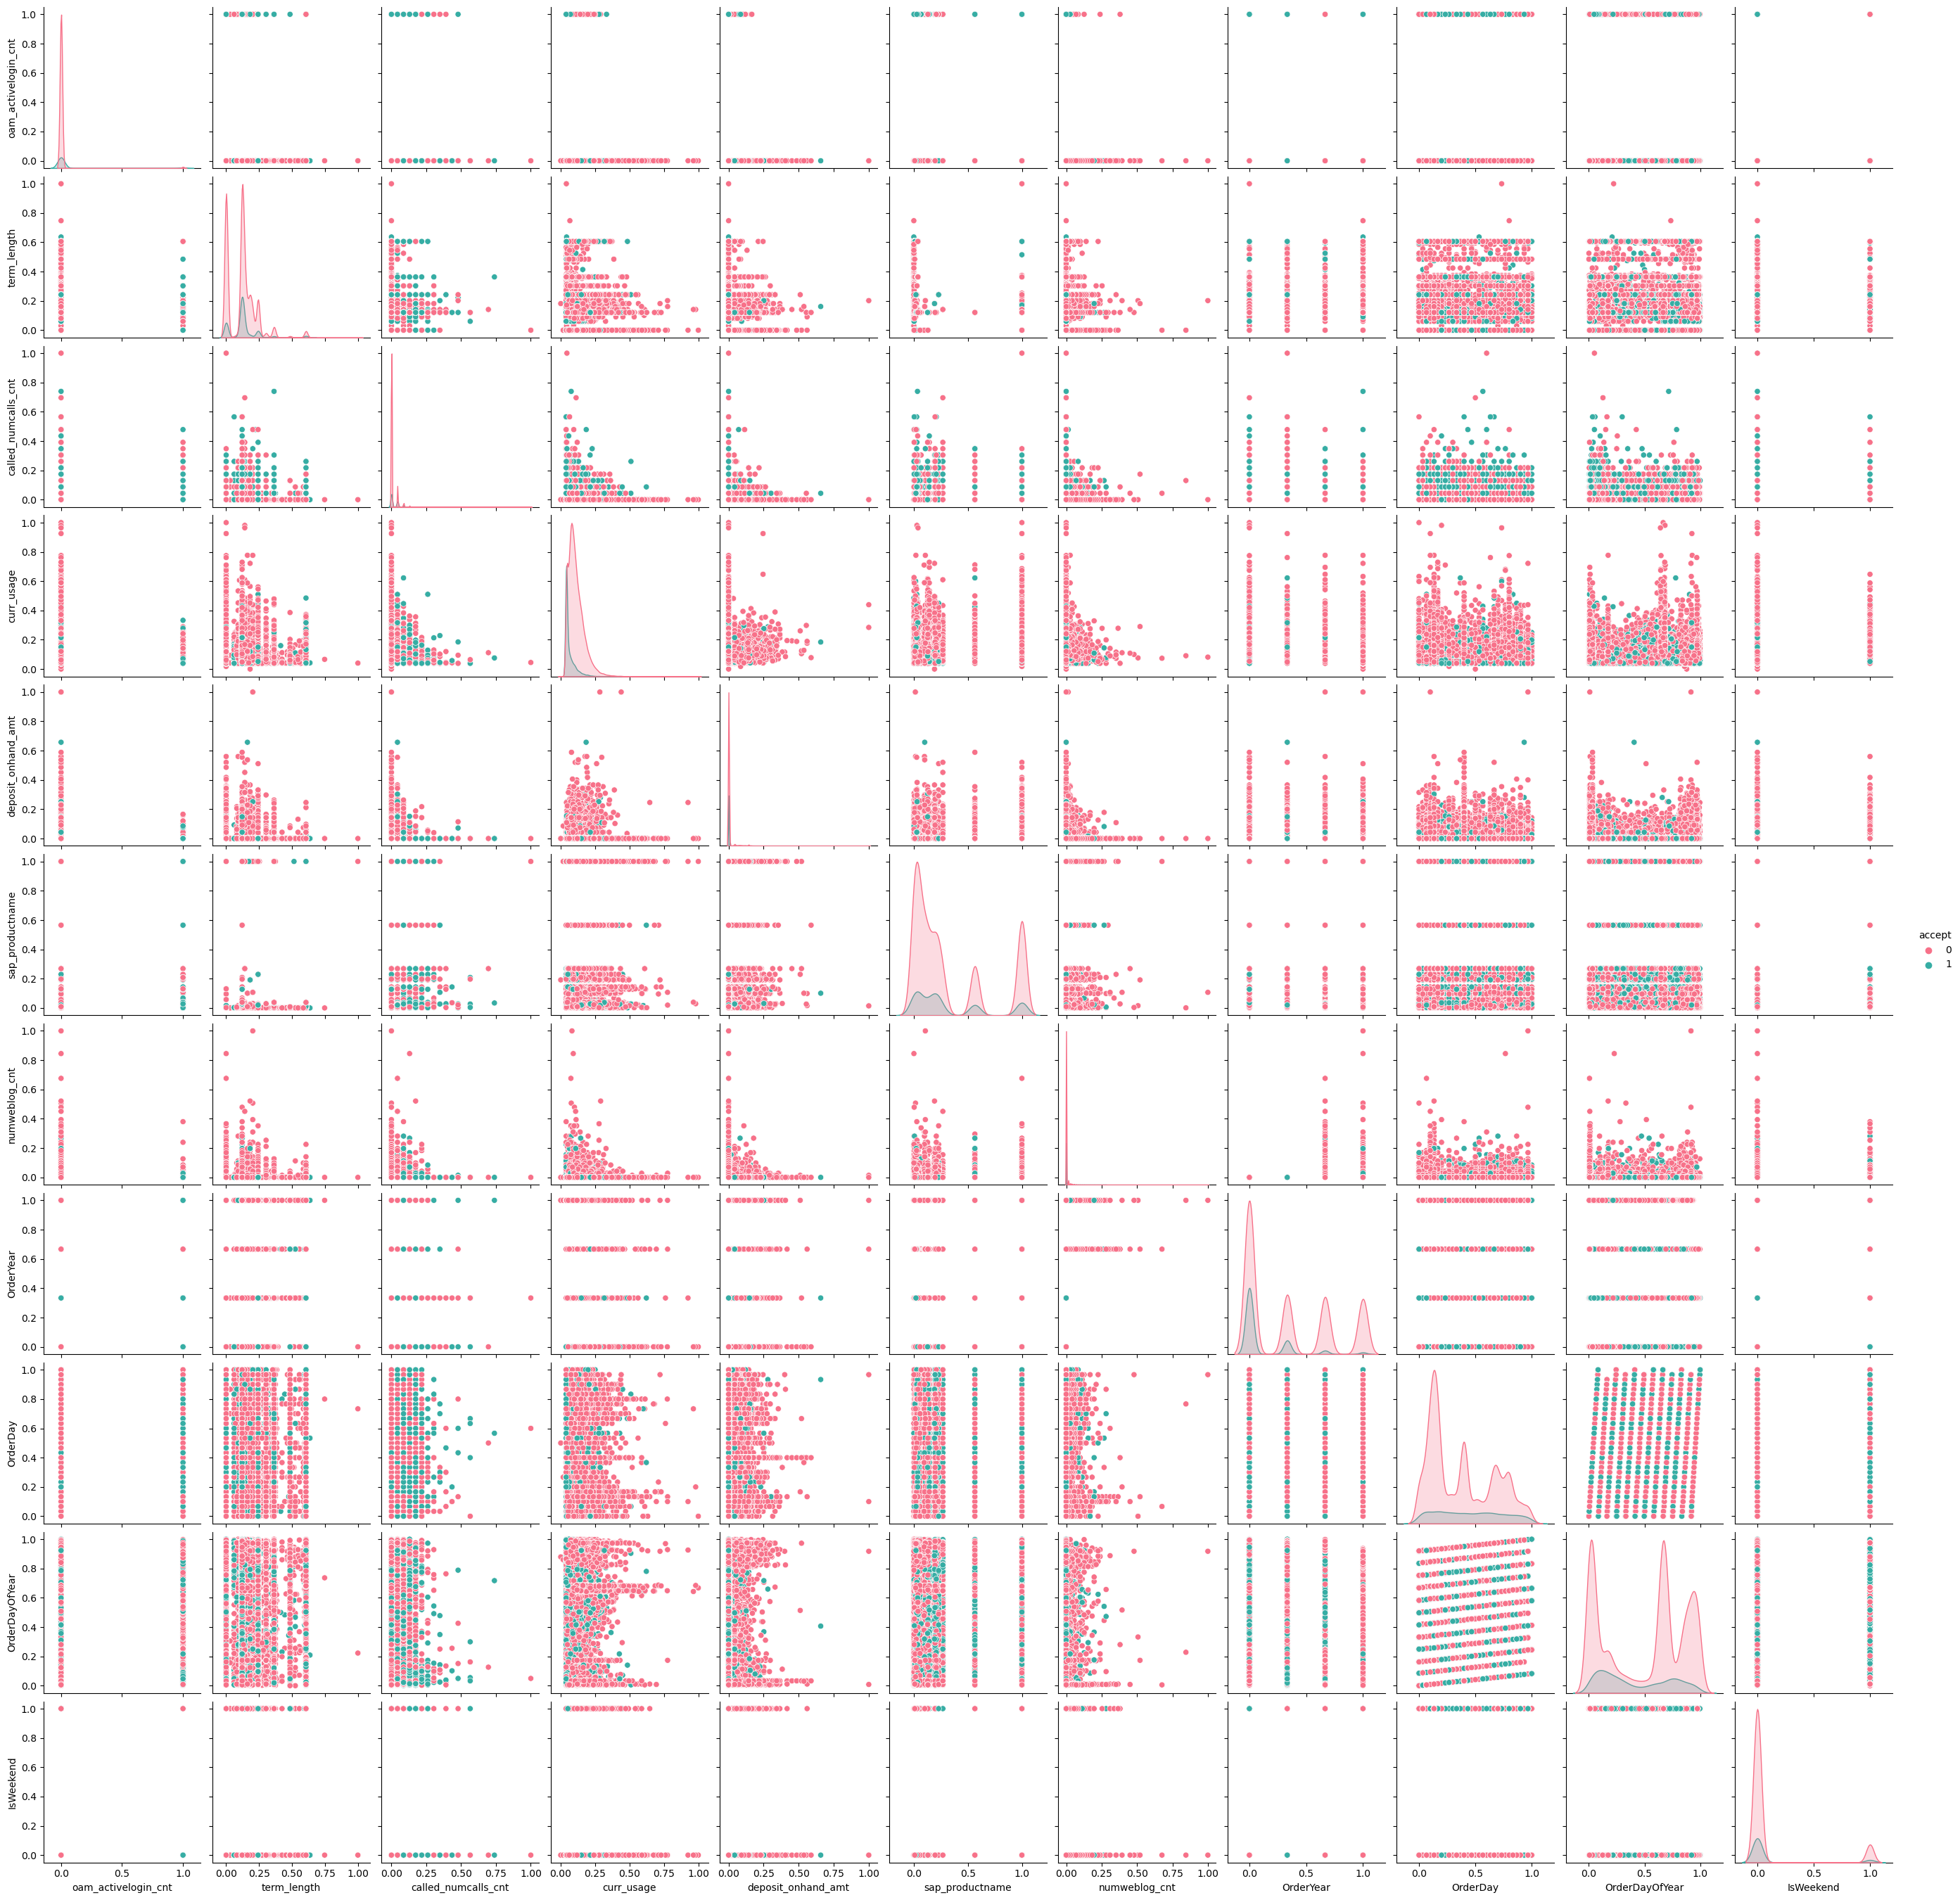

In [22]:
sns.pairplot(df,hue='accept',\
             vars=list(df_num.columns)
            , palette="husl")
plt.show()